In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle

In [117]:
# Fetching data
data = pd.read_csv('examination.csv')
mean = data.mean()
stddev = data.std()
data = (data - data.mean())/data.std()
data.head()

,exam1,exam2,accept
0,-1.594216,0.635141,-1.218606
1,-1.817101,-1.201489,-1.218606
2,-1.531325,0.359483,-1.218606
3,-0.280687,1.080923,0.812404
4,0.688062,0.490905,0.812404


In [118]:
# Separate out the Feature and Target matrices
data=np.asarray(data)
Y=data[:,-1:]
X=data[:,:-1]

# Nature of Data

# fig, ax = plt.subplots() 
# for i in range(len(X)):
#     if Y[i] == 1:
#         ax.plot(X[i][0], X[i][1], marker='o',color='b')
#     else:
#         ax.plot(X[i][0], X[i][1], marker='o',color='r')
one = np.ones((len(X),1))
X = np.concatenate((one,X),axis=1)
split_ratio = 0.7
split = int(split_ratio * X.shape[0])

X_train = X[:split+1, :]
Y_train = Y[:split+1, :]

X_test = X[split+1:,:]
Y_test = Y[split+1:,:]

# For Adding extra features for more accuracy

# X_train = np.concatenate((X_train,X_train[:,1:]**2), axis=1)
# X_test = np.concatenate((X_test,X_test[:,1:]**2), axis=1)


print(X_test.shape, X_train.shape)

(29, 3) (71, 3)


In [122]:
# Cost Function
def computeCost(X,Y,theta, lam):
    h = getG(X@theta)
#     print(theta,X@theta, h)
    eps = 1e-4
    lam_matrix = lam * np.ones(theta.shape)
    ret = -1 * Y.T@np.log(h+eps) - (1 - Y).T@np.log(1-h+eps)
    return ret[0][0] / len(X) + np.sum(lam_matrix, axis =1)/ (2* len(X))

def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev[2] + mean[2]
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        if(actual[i] != predicted[i]):
            error+=1
    error /= len(actual)
    return error*100

def getG(thetax):
#     print("hi",thetax)
    return (1 / (1 + np.exp(-1 * thetax)))

In [120]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = []
    for i in range(iters):   
        gx = getG(X @ theta)
        theta = theta - (alpha / len(X)) * X.T @(gx - y)
        cost.append(computeCost(X, y, theta, 0))
    return theta,cost


In [125]:
# Gradient Descent with regularisation
def gradientDescent2(X,y,theta,iters,alpha, lam):
    cost = []
    lam_matrix = lam * np.ones(theta.shape)
    lam_matrix[0][0] = 0
    for i in range(iters):
        gx = getG(X @ theta)
        theta = theta*(1- alpha*lam_matrix / len(X)) - (alpha / len(X)) * X.T @(gx - y)
        cost.append(computeCost(X, y, theta, lam))
    return theta,cost


In [134]:
theta = np.zeros([X_train.shape[1],1])
alpha = .01
iters = 1000
# print(computeCost(X_train, Y_train, theta).shape)
g,cost = gradientDescent2(X_train,Y_train,theta,iters,alpha, 0.01)
# print(g)
Y_pred = getG(X_test.dot(g))
Y_pred = denormalise_price(Y_pred)

for i in range(len(Y_pred)):
    if(Y_pred[i] >= 0.5):
        Y_pred[i] = 1
    else:
        Y_pred[i] = 0
# print(Y_pred, Y_test)
error = computeError(Y_pred,denormalise_price(Y_test))
# error = computeError(Y_pred, Y_test)
print("Accuracy : ", 100 - error)
print("Error : ", error)

Accuracy :  82.75862068965517
Error :  17.24137931034483


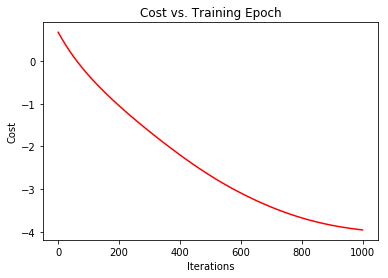

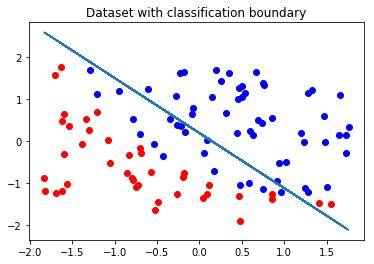

In [112]:
# Iteration vs Error(Cost) plot
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations') 
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Training Epoch') 

fig1,ax1 = plt.subplots()
ax1.set_title('Dataset with classification boundary') 
X_tmp = X[:,1:]
Y_tmp = denormalise_price(Y)
Y_out = []
for i in range(len(X_tmp)):
    Y_out.append((-g[0]-g[1]*X_tmp[i][0])/g[2])
    if Y_tmp[i] == 1:
        ax1.plot(X_tmp[i][0], X_tmp[i][1], marker='o',color='b')
    else:
        ax1.plot(X_tmp[i][0], X_tmp[i][1], marker='o',color='r')
Y_out = np.asarray(Y_out)
ax1.plot(X_tmp[:,:1],Y_out-1)

In [135]:
# GRadient Descent with Lambda
theta = np.zeros([X_train.shape[1],1])
alpha = 0.01
iters = 1000
lam = 0
# Running the Gradient Descent Function
error_matrix = []
lam_range = 100
for lam in range(lam_range):
    g,cost = gradientDescent2(X_train,Y_train,theta,iters,alpha, lam / 1000)
    Y_pred = getG(X_test.dot(g))
    Y_pred = denormalise_price(Y_pred)
    for i in range(len(Y_pred)):
        if(Y_pred[i] >= 0.5):
            Y_pred[i] = 1
        else:
            Y_pred[i] = 0
    error = computeError(Y_pred,denormalise_price(Y_test))
    error_matrix.append(error)

Text(0.5, 1.0, 'Error vs. Lambda')

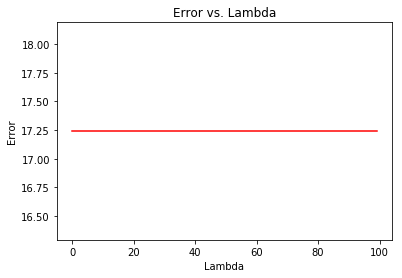

In [114]:
# Lambda vs Error(Cost) plot
fig, ax = plt.subplots()  
ax.plot(np.arange(lam_range), error_matrix, 'r')
ax.set_xlabel('Lambda') 
ax.set_ylabel('Error') 
ax.set_title('Error vs. Lambda') 